### Se carga nuevamente el data cleaning y el data partition en este nuevo Notebook

In [2]:
# importing modules
import numpy as np
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import math as mt
import tensorflow as tf
from scipy.stats import norm
from numpy import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn import svm
from sklearn import metrics
import pickle
import joblib as jl
#from Naive_Class import naive_training 
import Ipynb_importer
import Naive_Class
from Naive_Class import naive_training 

In [3]:
def data_cleaning(data_w): #Recibe la data X_train
    #Eliminando Variables que no sirven en prediccion
    data_w = data_w.drop(["PassengerId", "Cabin", "Ticket", "Name","SibSp", "Parch" ], axis=1)
    
    #Modificando variable Age, nueva variable agerand
    data_w["AgeRand"] = data_w["Age"]
    null_rows = data_w['AgeRand'].isnull()
    num_null_rows = sum(null_rows)
    rand = random.randint(1, 65, size=num_null_rows)
    data_w.loc[null_rows, 'AgeRand'] = rand
    
    #Trabajando con Outliers:
    data_w["AgeRand"] = np.where(data_w["AgeRand"] < 9, 14,data_w["AgeRand"])
    data_w["AgeRand"] = np.where(data_w["AgeRand"] > 60, 60,data_w["AgeRand"])
    
    #Trabajando con variables continuas:
    DUM_pass_class = pd.get_dummies(data_w["passenger_class"], prefix='passenger_class')
    DUM_pass_sex = pd.get_dummies(data_w["passenger_sex"], prefix='passenger_sex')
    DUM_pass_embarked = pd.get_dummies(data_w["Embarked"], prefix='Embarked')
    data_w = pd.concat([data_w,DUM_pass_class,DUM_pass_sex, DUM_pass_embarked], axis=1)
    
    data_w = data_w.drop(["passenger_class","passenger_sex", "Embarked", "Age"], axis=1)
    data_w['Age_sqrt'] = data_w['AgeRand'].apply(np.sqrt)
    data_w['Fare_Sqrt'] = data_w['Fare'].apply(np.sqrt)
    
    data_w = data_w.drop(["AgeRand", "Fare"], axis=1)
    
    #Feature Scaling
    scaler = MinMaxScaler()
    for column in data_w.columns:
        nombre = "scl_" + column
      #  print(nombre)
        data_w[nombre]= (data_w[column] - data_w[column].mean()) / data_w[column].std() 
    
    
    data_w = data_w.drop(["passenger_class_Lower", "passenger_class_Middle","passenger_class_Upper",
                       "passenger_sex_F","passenger_sex_M","Embarked_C","Embarked_Q","Embarked_S", "Age_sqrt",
                       "Fare_Sqrt"], axis=1)
    
    #print("Estas son las variables que quedan", data_w.info())
    return(data_w)

In [4]:
def data_split(data):    
    
    x = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
    y = data.iloc[:,[11]]
    X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.20, random_state=42, shuffle = True)
    
    X_train, X_val, Y_train, Y_val =  train_test_split(X_train,Y_train,test_size=0.20, random_state=42, shuffle = True)
    return(X_train, X_test, Y_train, Y_test, X_val, Y_val)

In [5]:
data = pd.read_csv('data_titanic_proyecto.csv')

X_train, X_test, Y_train, Y_test, X_val, Y_val = data_split(data)

X_train = data_cleaning(X_train)
X_test = data_cleaning(X_test)
X_val = data_cleaning(X_val)


## Aqui empieza las cargas de los modelos

## Crear una función que prediga para cierta observación (una sola) x la predicción y_hat combinada y además:

In [53]:
def carga_modelos(X_val):

    filename="TREE_Dep=20.pkl"
    arbol = jl.load(filename,mmap_mode='r')
    
    filename2 = "SVM_DG=3_ACC=0.83_REC=0.67_F1=0.75_PR=0.84.pkl"
    svm = jl.load(filename2, mmap_mode = 'r')
    
    filename3="Naive5=ACC=0.77PRE=0.68.pkl"
    naivev = jl.load(filename3,mmap_mode='r')
    
    filename4 = "Log_V2=0.0025_ACC=0.78_REC=0.72_F1=0.71_PR=0.69.pkl"
    lr = jl.load(filename4,mmap_mode='r')
    
    info_arbol= arbol.predict(X_val)
    info_svm= svm.predict(X_val)
    info_naive = naive_training.Naive_Predict(X_val,naivev3[0],naivev3[1], naivev3[2], naivev3[3])
    info_reglog= lr.predict(X_val)
    
    data_final = pd.DataFrame({'DT': info_arbol,'SVM': info_svm,'NB': info_naive,'LR': info_reglog })
    
    mean_val = data_final.mode(axis=1)
    Y_hat = mean_val[0]
    
    plt.figure(figsize=(10,10))    
    tree.plot_tree(arbol,fontsize=10,max_depth=4) 
    plt.show()
    


### Llamada a la función con una sola linea de información:

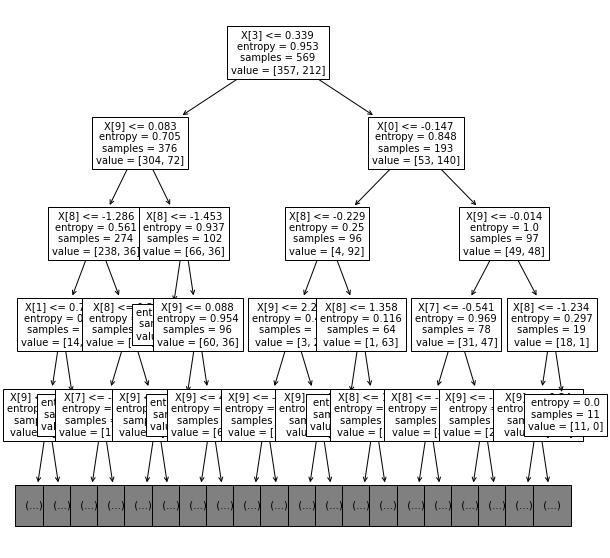

In [54]:

#Información a predecir:
X_val1= X_val.iloc[[20]]
X_val1
carga_modelos(X_val1)


## Probar la función anterior para 10 observaciones x distintas(pueden ser del dataset original o inventadas.)

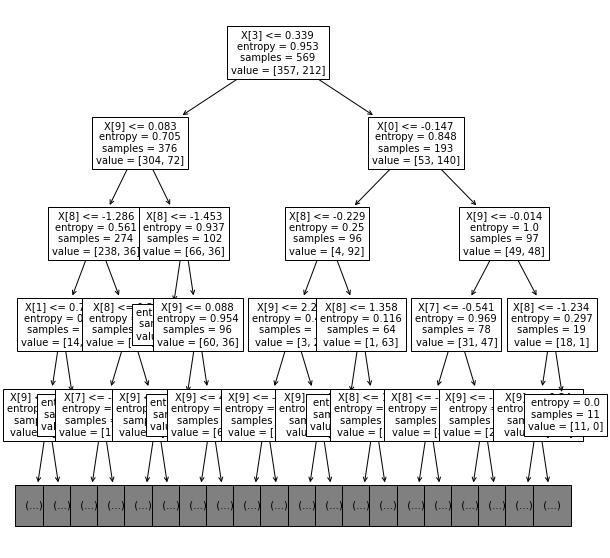

In [56]:
#Información a predecir:
X_val1= X_train.iloc[[20,40,60,80,100,101,110,120,150,221]]
X_val1
carga_modelos(X_val1)